## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import geopandas as gpd

%matplotlib inline

In [2]:
from src.util import preprocess, df_to_gdf, add_region, encode_region, preprocess_for_tsfresh, drop_unused_cols, get_label_encoder

In [3]:
DATA_DIR = "data/"

In [4]:
regions = gpd.read_file(DATA_DIR + "boundaries/admin_level_4.shp")

In [5]:
regions = regions[["name_en", "geometry"]]

In [6]:
regions.head()

,name_en,geometry
0,None,"POLYGON ((35.39847 50.90907, 35.39812 50.90910..."
1,Kamchatka Krai,"MULTIPOLYGON (((168.44560 54.51135, 168.44581 ..."
2,Murmansk Oblast,"POLYGON ((42.50570 66.99024, 42.31571 66.86190..."
3,Perm Krai,"POLYGON ((59.48273 60.82788, 59.47942 60.82226..."
4,Sverdlovsk Oblast,"POLYGON ((66.18486 58.01097, 66.18442 58.01063..."


In [19]:
train_df = df_to_gdf(preprocess(pd.read_csv(DATA_DIR + "train_dataset_train.csv")))
test_df = df_to_gdf(preprocess(pd.read_csv(DATA_DIR + "test_dataset_test.csv")))

In [20]:
add_region(train_df, regions)
add_region(test_df, regions)

In [378]:
train_df["region"].value_counts()

Voronezh Oblast           1256
Tatarstan                  804
Bryansk Oblast             726
Bashkortostan              687
Nizhny Novgorod Oblast     318
Tula Oblast                317
Oryol Oblast               255
Ryazan Oblast              165
Lipetsk Oblast             152
Sverdlovsk Oblast          113
Perm Krai                   40
Moscow Oblast               29
Kaluga Oblast               25
Chelyabinsk Oblast          11
Name: region, dtype: int64

In [379]:
test_df["region"].value_counts()

Voronezh Oblast           520
Tatarstan                 365
Bryansk Oblast            326
Bashkortostan             304
Nizhny Novgorod Oblast    135
Tula Oblast               135
Oryol Oblast              118
Ryazan Oblast              69
Lipetsk Oblast             51
Sverdlovsk Oblast          37
Moscow Oblast              19
Perm Krai                  11
Kaluga Oblast               6
Chelyabinsk Oblast          4
Name: region, dtype: int64

In [21]:
encode_region(train_df)
encode_region(test_df)

In [81]:
# skip previous steps
train_df = pd.read_csv(DATA_DIR + "train_with_reg.csv").set_index("id")
test_df = pd.read_csv(DATA_DIR + "test_with_reg.csv").set_index("id")

In [22]:
train_df.head()

,area,crop,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,...,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,geometry,region
id,,,,,,,,,,,,,,,,,,,,,
3536,20,3,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,0.070279,0.077577,...,0.754859,0.392871,0.030883,0.344449,0.658016,0.126832,0.034858,0.614770,"POLYGON ((42.49107 51.41404, 42.49111 51.41400...",13
3739,45,4,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,0.024539,0.173578,...,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.177263,0.179612,"POLYGON ((50.25545 56.60539, 50.25552 56.60523...",11
1294,28,2,0.006391,0.013679,0.010367,0.007055,0.063929,0.120804,0.112471,0.041751,...,0.384232,0.357296,0.045370,0.172080,0.131344,0.090607,0.072367,0.054127,"POLYGON ((37.99699 53.83590, 38.00572 53.83333...",12
2859,19,5,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,0.045054,0.072589,...,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900,"POLYGON ((44.72154 55.93534, 44.72321 55.93180...",6
3685,33,4,0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,0.163886,0.109385,...,0.772962,0.426777,0.080592,0.067906,0.055220,0.157676,0.022251,0.012048,"POLYGON ((34.77830 52.90720, 34.77878 52.90710...",1


In [5]:
from src.util import get_ndvi_transformer, get_ndvi_columns

In [62]:
train_df[get_ndvi_columns(train_df)] = get_ndvi_transformer().transform(train_df[get_ndvi_columns(train_df)])
train_df.head()

,area,crop,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,...,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,geometry,region
id,,,,,,,,,,,,,,,,,,,,,
1612,40,5,1,2,2,1,2,1,3,3,...,2,1,2,3,3,3,2,2,"POLYGON ((49.33090116928615 56.21617907928448,...",11
978,75,0,2,2,2,2,3,3,1,1,...,4,4,2,2,4,2,2,1,"POLYGON ((41.41193007246033 51.19044521258488,...",13
3050,75,6,2,1,2,2,2,2,2,1,...,4,3,3,1,3,2,1,1,POLYGON ((40.886362633498784 50.47752883228001...,13
4960,55,1,2,2,2,1,1,1,1,1,...,1,1,1,1,2,3,4,1,POLYGON ((33.86367532118728 53.275929113252154...,1
2548,25,6,1,1,1,2,1,2,1,1,...,2,3,1,2,3,1,2,2,POLYGON ((56.313679477117425 54.39526427734551...,0


In [63]:
test_df[get_ndvi_columns(test_df)] = get_ndvi_transformer().transform(test_df[get_ndvi_columns(test_df)])
test_df.head()

,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,...,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,geometry,region
id,,,,,,,,,,,,,,,,,,,,,
3961,15,3,2,1,1,3,3,3,3,3,...,2,1,1,2,1,3,3,3,"POLYGON ((38.77191042694808 51.52062992190253,...",13
811,13,1,1,1,2,1,3,1,2,3,...,1,1,2,1,4,3,1,3,POLYGON ((34.256780726407946 52.28151933528722...,1
2471,33,2,2,2,2,2,2,2,1,1,...,1,2,2,3,2,2,2,2,"POLYGON ((54.60044393889954 55.62901279928434,...",0
3950,26,2,1,1,1,1,1,3,1,2,...,1,1,1,2,2,2,1,1,POLYGON ((40.815583287874645 50.48142482488441...,13
414,33,2,2,2,1,2,1,3,2,1,...,2,3,3,3,3,2,1,1,POLYGON ((48.248953897196024 55.12399823355188...,11


<AxesSubplot: >

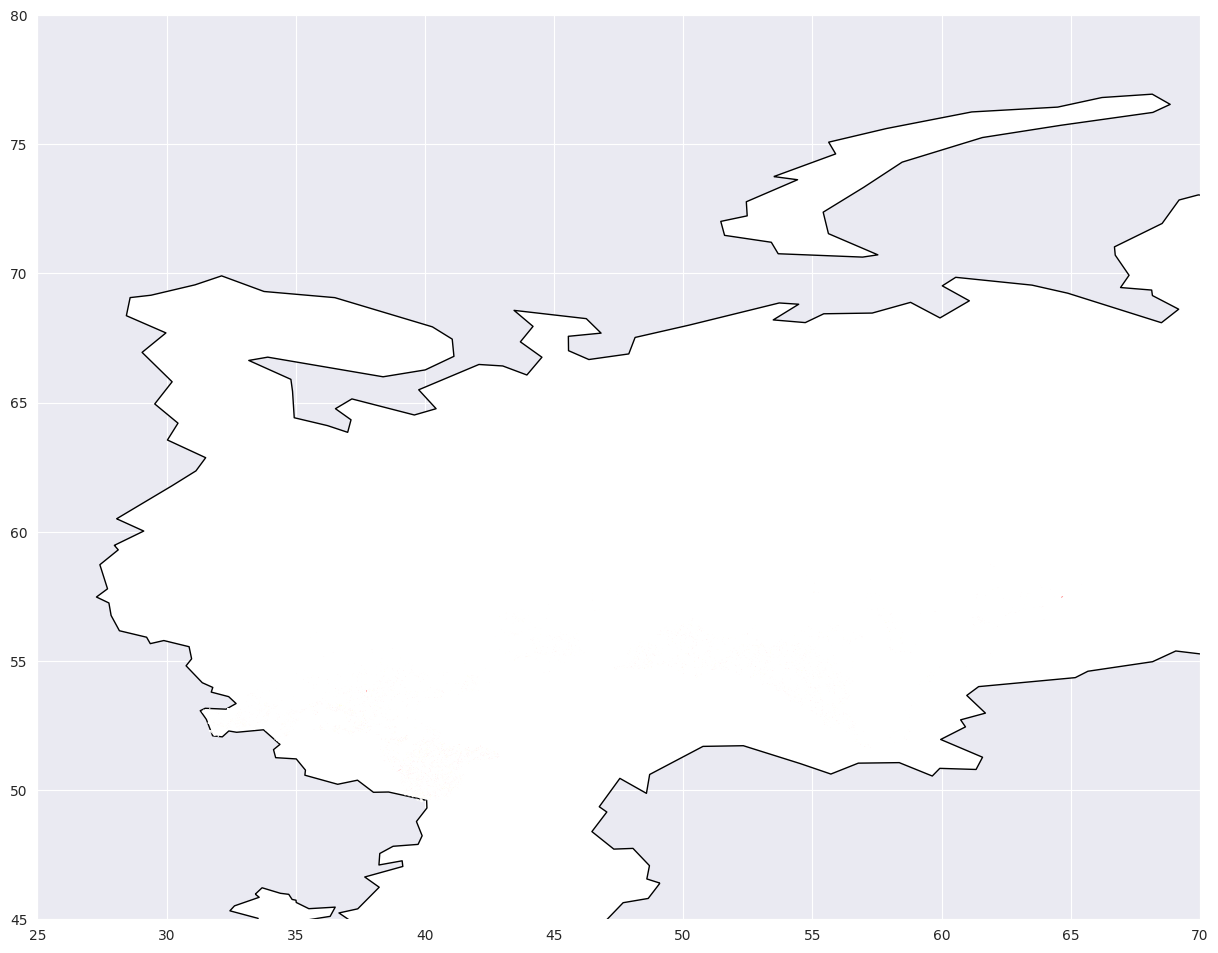

In [383]:
plt.rcParams['figure.figsize'] = (15, 15)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world[world.iso_a3 == 'RUS'].plot(color='white', edgecolor='black')
ax.set_xlim(25, 70)
ax.set_ylim(45, 80)
train_df.plot(ax=ax, color='red')
test_df.plot(ax=ax, color='yellow')

<AxesSubplot: >

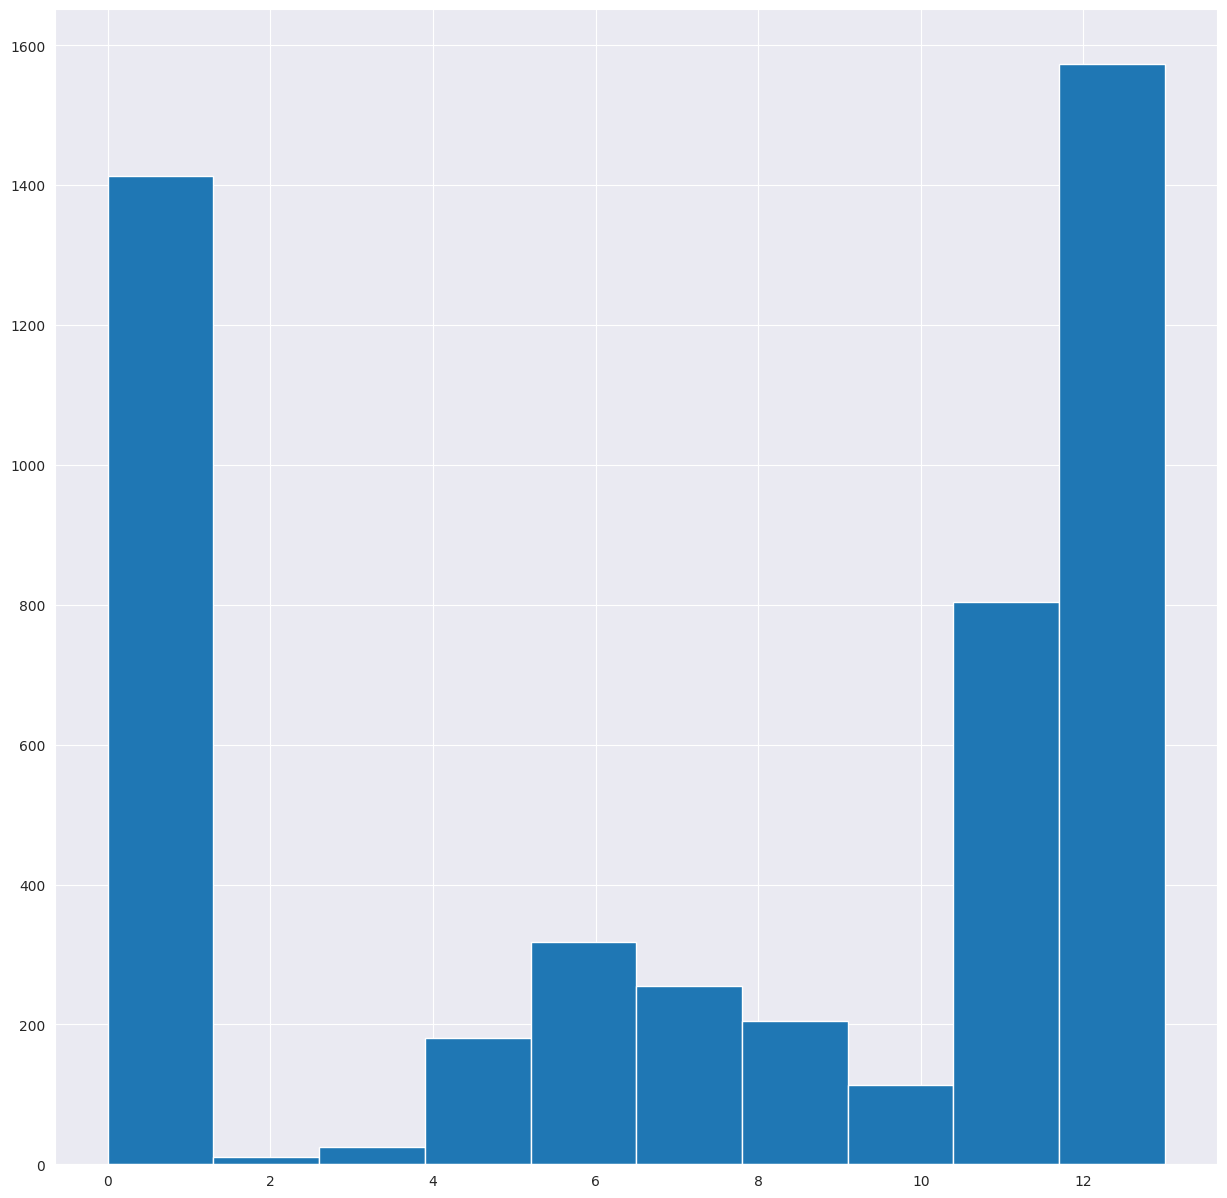

In [384]:
train_df["region"].hist()

<AxesSubplot: >

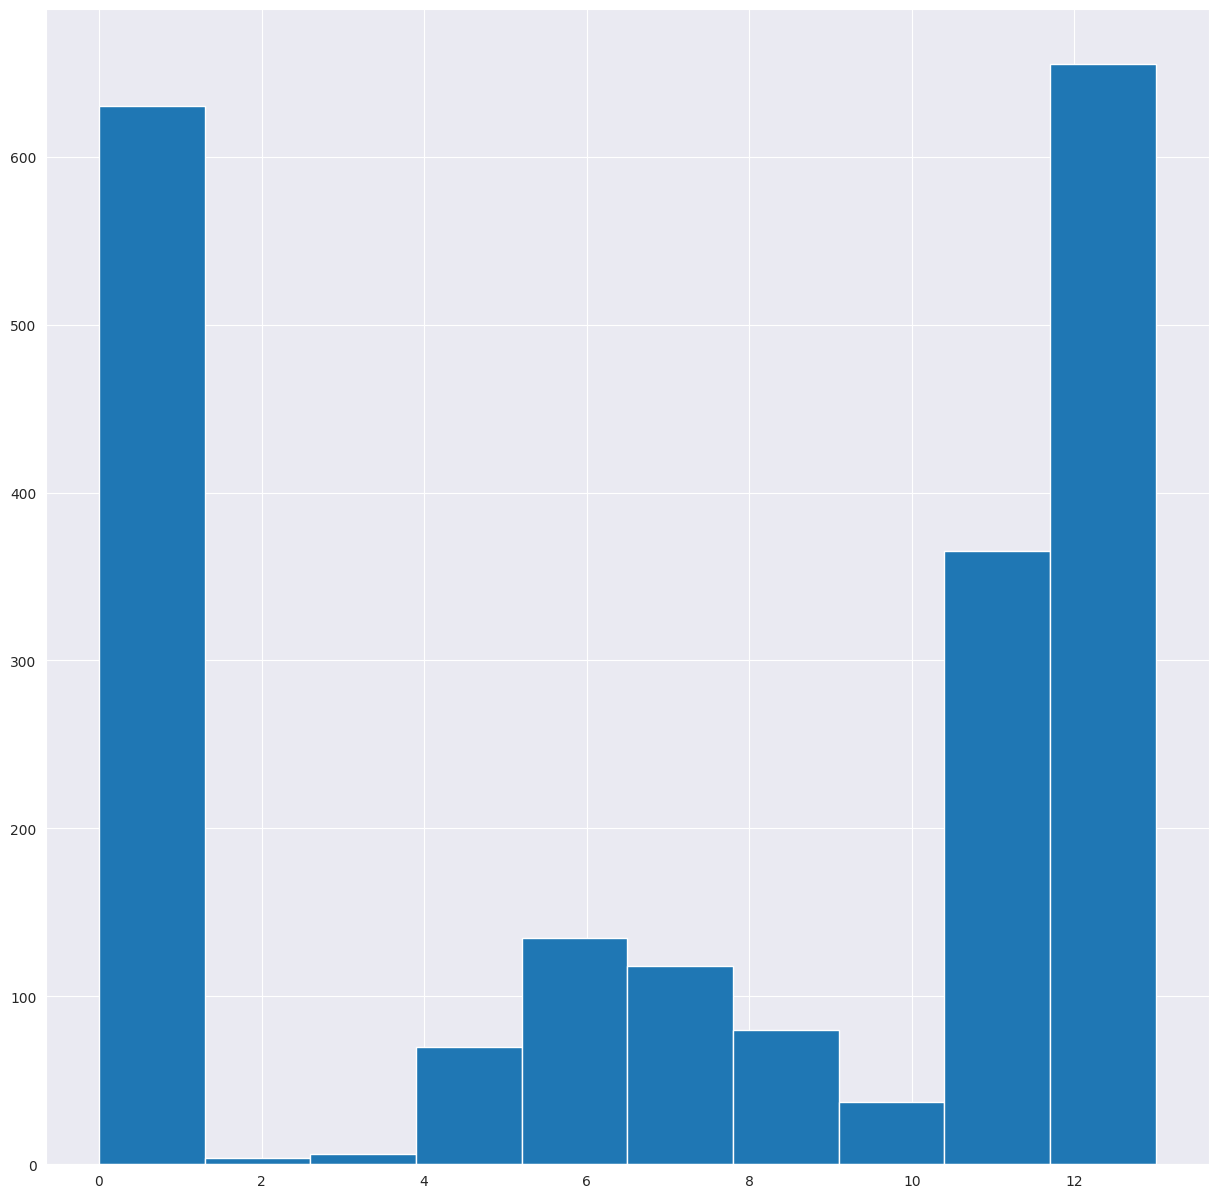

In [385]:
test_df["region"].hist()

Теперь рассмотрим главный столбец с C/Х культурой

<AxesSubplot: >

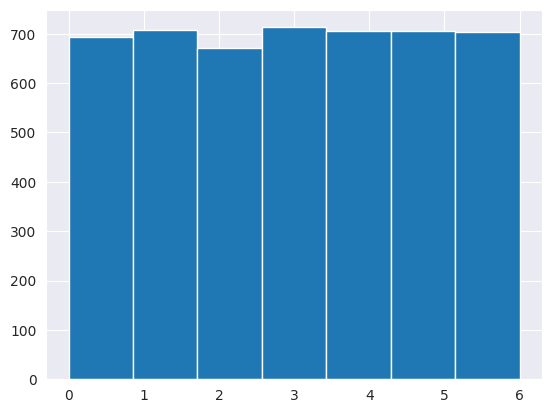

In [98]:
train_df["crop"].hist(bins=7)

Заметен слабый разброс популярности категорий

In [221]:
train_df.region.value_counts()

13    1256
11     804
1      726
0      687
6      318
12     317
7      255
9      165
4      152
10     113
8       40
5       29
3       25
2       11
Name: region, dtype: int64

<AxesSubplot: >

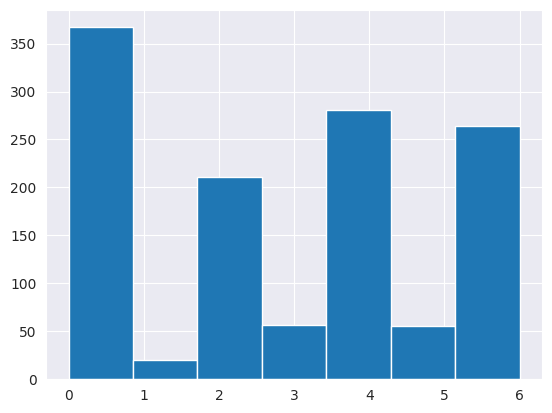

In [222]:
train_df.loc[train_df.region == 13, "crop"].hist(bins=7)

In [526]:
train_df["crop"].value_counts()

3    713
1    707
5    706
4    705
6    703
0    693
2    671
Name: crop, dtype: int64

Посмотрим на разброс площади полей

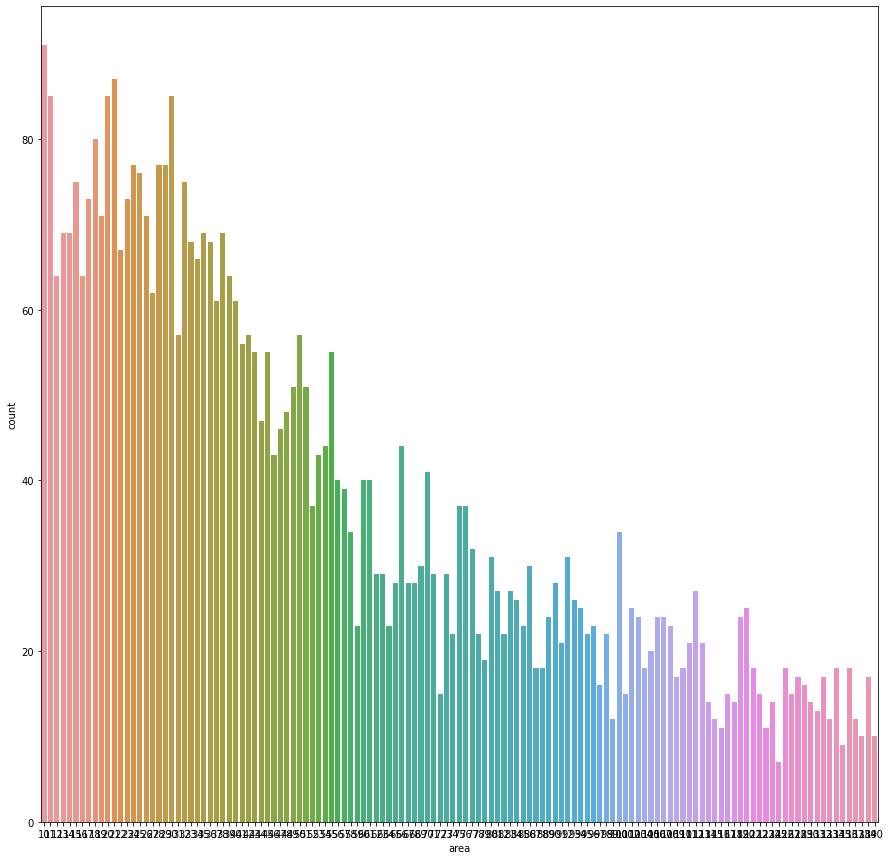

In [527]:
sns.countplot(x="area", data=train_df)

Последняя попытка найти явную зависимость в данных

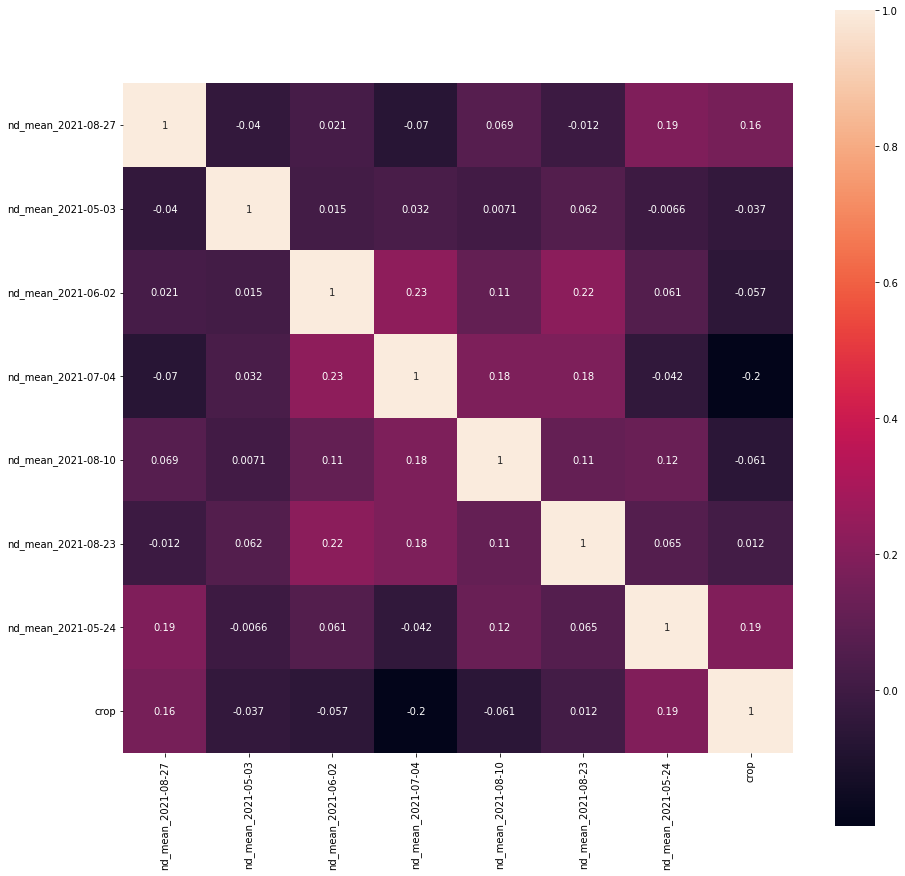

In [529]:
plt.rcParams['figure.figsize'] = (15, 15)

corr = train_df.loc[:, "nd_mean_2021-08-27":"crop"].corr()
g = sns.heatmap(corr, square=True, annot=True)

## Выделим выборки

In [105]:
def merge_mean(df: pd.DataFrame, next_col_iter: callable) -> pd.DataFrame:
    nd_cols = get_ndvi_columns(df)
    tmp = df.drop(columns=nd_cols)

    curr_idx = 0
    curr_col = nd_cols[0]
    next_col = next_col_iter(nd_cols, curr_col)
    while next_col is not None:
        tmp[f"nd_mean_{curr_idx}"] = df.loc[:, curr_col:next_col].mean(axis=1)
        curr_col = next_col
        next_col = next_col_iter(nd_cols, curr_col)
        curr_idx += 1
    return tmp

In [106]:
def half_month(cols: list[str], curr: str):
    next_col = None

    def dm(col):
        return tuple(map(int, col.split("-")[-2:]))[::-1]

    day_curr, month_curr = dm(curr)

    if day_curr >= 15:
        for c in cols:
            if dm(c)[1] > month_curr:
                next_col = c
                break
    else:
        for c in cols:
            d, m = dm(c)
            if d >= 15 and m == month_curr:
                next_col = c
                break

    if next_col is None and cols.index(curr) != len(cols) - 1:
        return cols[-1]

    return next_col

In [107]:
train_df = merge_mean(train_df, half_month)
test_df = merge_mean(test_df, half_month)

In [8]:
from tsfresh import extract_relevant_features

In [9]:
y_tsf, X_tsf = preprocess_for_tsfresh(train_df)

In [10]:
features_filtered_direct = extract_relevant_features(X_tsf, y_tsf,
                                                     column_id='id', column_sort='time', ml_task='classification')
features_filtered_direct

Feature Extraction: 100%|██████████| 40/40 [00:32<00:00,  1.23it/s]


,"ndvi__fft_coefficient__attr_""real""__coeff_5",ndvi__index_mass_quantile__q_0.9,ndvi__energy_ratio_by_chunks__num_segments_10__segment_focus_9,"ndvi__fft_coefficient__attr_""real""__coeff_12","ndvi__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""var""","ndvi__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""var""","ndvi__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""","ndvi__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""","ndvi__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""max""","ndvi__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""max""",...,"ndvi__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)","ndvi__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)",ndvi__lempel_ziv_complexity__bins_100,"ndvi__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",ndvi__absolute_sum_of_changes,ndvi__mean_abs_change,"ndvi__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)",ndvi__c3__lag_3,"ndvi__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6",ndvi__large_standard_deviation__r_0.25
2,2.954044,0.885714,0.066654,1.271774,0.664352,0.056168,0.033135,0.015238,0.491582,0.475320,...,0.096651,0.390612,0.785714,0.237714,16.402285,0.237714,0.091217,0.037784,0.002978,1.0
3,0.669975,0.928571,0.107886,0.178504,0.579581,0.035913,0.007468,0.009467,0.798514,0.866791,...,0.110160,0.139624,0.814286,0.173010,11.937669,0.173010,0.118056,0.052750,0.002456,1.0
4,-0.316709,0.914286,0.101637,2.487620,0.466196,0.038811,0.020375,0.016321,0.398052,0.444416,...,0.409071,0.134500,0.800000,0.159487,11.004597,0.159487,0.415093,0.026282,0.000601,1.0
5,3.659520,0.857143,0.033114,1.332066,0.093042,0.079423,0.049211,0.029761,0.225723,0.308542,...,0.199010,-0.101400,0.785714,0.223382,15.413389,0.223382,0.177886,0.062558,0.005912,1.0
6,0.098445,0.885714,0.050088,-0.119933,0.468925,0.044083,0.012458,0.024562,0.505170,0.604641,...,0.248658,-0.024739,0.800000,0.175003,12.075224,0.175003,0.223162,0.036272,0.001979,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,2.786026,0.871429,0.043284,3.779670,0.376449,0.071323,0.032661,0.030072,0.329663,0.478790,...,0.156469,0.130717,0.771429,0.190128,13.118806,0.190128,0.142626,0.044227,0.001862,1.0
6994,-3.312135,0.914286,0.110782,-0.766604,0.346298,0.048666,0.025943,0.008393,0.517484,0.630367,...,0.286532,-0.108936,0.757143,0.187186,12.915839,0.187186,0.283740,0.053556,0.002365,1.0
6995,0.067760,0.914286,0.109369,-1.035737,0.866255,0.046621,0.015733,0.016872,0.630621,0.797252,...,0.075943,-0.186225,0.814286,0.199328,13.753659,0.199328,0.050841,0.041661,0.003828,1.0
6998,-0.204569,0.900000,0.074757,1.777082,0.804040,0.038266,0.012323,0.021334,0.427372,0.602052,...,0.225449,0.114037,0.785714,0.180606,12.461781,0.180606,0.169428,0.036887,0.004420,1.0


In [23]:
X = drop_unused_cols(train_df).drop(["crop"], axis=1)
y = train_df.crop.ravel()

In [109]:
X.head()

,region,nd_mean_0,nd_mean_1,nd_mean_2,nd_mean_3,nd_mean_4,nd_mean_5,nd_mean_6,nd_mean_7,nd_mean_8
id,,,,,,,,,,
1612,11,0.253492,0.278342,0.449182,0.396132,0.652195,0.328801,0.290265,0.328635,0.360077
978,13,0.267352,0.345133,0.316424,0.171009,0.608066,0.603814,0.720262,0.465378,0.194091
3050,13,0.251123,0.222583,0.418596,0.234459,0.634488,0.612662,0.646702,0.380863,0.034929
4960,1,0.201132,0.416666,0.437968,0.314056,0.733379,0.715277,0.601270,0.267649,0.413844
2548,0,0.159893,0.243035,0.475410,0.194204,0.430320,0.459409,0.406145,0.291514,0.297340


## Обучение модели

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(features_filtered_direct, y_tsf, test_size=0.3, random_state=42)

<AxesSubplot: >

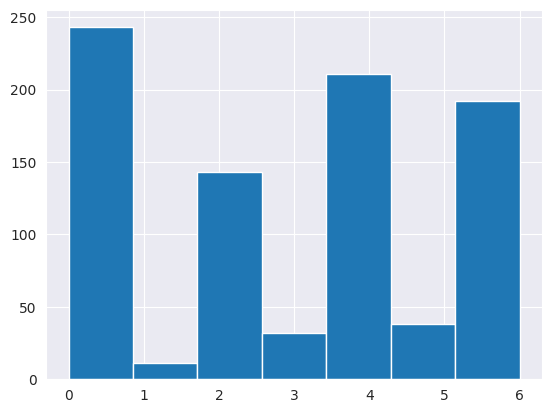

In [224]:
tmp = X_train.copy()
tmp["crop"] = y_train
tmp.loc[tmp.region == 13, "crop"].hist(bins=7)

In [26]:
X_submission = drop_unused_cols(test_df)

In [231]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
all_preds = X_test.copy()
all_preds["crop"] = 0

submission_preds = X_submission.copy()
submission_preds["crop"] = 0

for i, reg in enumerate(get_label_encoder().classes_):
    print(reg)
    clf = SVC(random_state=42, decision_function_shape='ovr', break_ties=True,
              **{'C': 10_000, 'kernel': 'rbf'})
    flt = X_train.region == i
    # clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=min(len(X_train[flt]), 15))
    clf.fit(X_train[flt].drop(["region"], axis=1), y_train[X_train.region == i])
    print('Samples:', len(X_train[flt]))
    pred = clf.predict(X_train[flt].drop(["region"], axis=1))
    print('Train:', recall_score(y_train[flt], pred, average="macro", zero_division=0) * 100)
    flt = X_test.region == i
    pred = clf.predict(X_test[flt].drop(["region"], axis=1))
    all_preds.loc[all_preds.region == i, "crop"] = pred
    print('Test:', recall_score(y_test[flt], pred, average="macro", zero_division=0) * 100)

    flt = X_submission.region == i
    pred = clf.predict(X_submission[flt].drop(["region"], axis=1))
    submission_preds.loc[flt, "crop"] = pred
    print()

print('Test total:',
      recall_score(y_test, all_preds["crop"].ravel(), average="macro", zero_division=0) * 100)
submission_df = submission_preds[["crop"]]

Bashkortostan
Samples: 484
Train: 100.0
Test: 95.02164502164503

Bryansk Oblast
Samples: 497
Train: 100.0
Test: 84.00454794950207

Chelyabinsk Oblast
Samples: 10
Train: 100.0
Test: 100.0

Kaluga Oblast
Samples: 16
Train: 100.0
Test: 25.0

Lipetsk Oblast
Samples: 103
Train: 100.0
Test: 48.02721088435374

Moscow Oblast
Samples: 23
Train: 100.0
Test: 50.0

Nizhny Novgorod Oblast
Samples: 216
Train: 100.0
Test: 73.57142857142858

Oryol Oblast
Samples: 169
Train: 100.0
Test: 91.11111111111111

Perm Krai
Samples: 29
Train: 100.0
Test: 75.0

Ryazan Oblast
Samples: 108
Train: 100.0
Test: 62.66233766233766

Sverdlovsk Oblast
Samples: 74
Train: 100.0
Test: 75.0

Tatarstan
Samples: 527
Train: 100.0
Test: 98.50840336134453

Tula Oblast
Samples: 226
Train: 100.0
Test: 67.3469387755102

Voronezh Oblast
Samples: 899
Train: 100.0
Test: 88.333705678585

Test total: 92.21150582846572


In [17]:
submission_df

,crop
id,
3961,3
811,2
2471,3
3950,5
414,4
...,...
5201,2
5465,1
6640,3


In [212]:
train_df[train_df.crop == 2].head()

,area,crop,geometry,region,nd_mean_0,nd_mean_1,nd_mean_2,nd_mean_3,nd_mean_4,nd_mean_5,nd_mean_6,nd_mean_7,nd_mean_8
id,,,,,,,,,,,,,
6534,79,2,POLYGON ((41.496144722491884 54.89599918100276...,9,0.274798,0.250868,0.433575,0.276029,0.677953,0.441628,0.358633,0.300580,0.290583
2131,23,2,"POLYGON ((42.721915804931 55.94088315525214, 4...",6,0.229063,0.240189,0.314661,0.217040,0.665024,0.403157,0.589219,0.358104,0.269683
3783,126,2,POLYGON ((39.900678261920255 54.12164501540243...,9,0.141356,0.108776,0.476262,0.300737,0.680056,0.493502,0.378631,0.200225,0.067184
4165,26,2,POLYGON ((38.907556167421795 54.25259792369697...,9,0.162825,0.240136,0.307877,0.233634,0.651566,0.512067,0.397858,0.278624,0.413565
4746,42,2,"POLYGON ((36.13408008872133 54.41834702968987,...",3,0.177932,0.250352,0.403234,0.342114,0.665000,0.630352,0.643839,0.339366,0.308334


<AxesSubplot: >

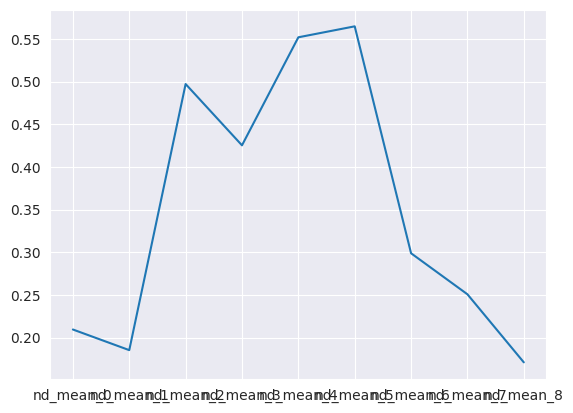

In [211]:
train_df.loc[1743, get_ndvi_columns(train_df)].plot()

<AxesSubplot: >

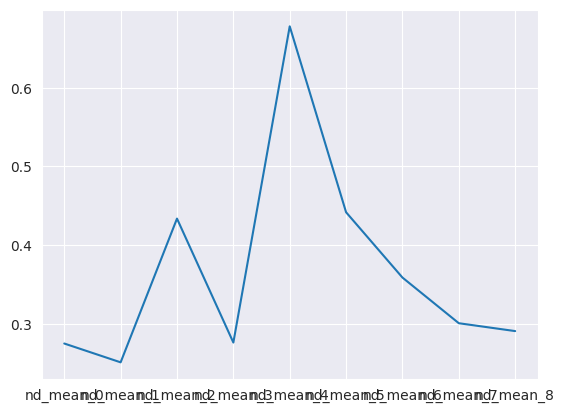

In [213]:
train_df.loc[6534, get_ndvi_columns(train_df)].plot()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10)

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
clf = RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1, max_depth=10, criterion="entropy")

# clf = NuSVC(kernel='rbf', random_state=42, decision_function_shape='ovr', nu=0.35, break_ties=True)
# clf = SVC(random_state=42, decision_function_shape='ovr', break_ties=True,
#           **{'C': 10_000, 'kernel': 'rbf'})

In [391]:
cross_val_score(clf, X_train, y_train, cv=kfold, verbose=1, n_jobs=-1, scoring='recall_macro')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished


array([0.79685828, 0.83179839, 0.78421175, 0.80784189, 0.78435261,
       0.82087784, 0.82161073, 0.7696559 , 0.80557707, 0.80933792])

In [129]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000, 10_000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000, 10_000]},
                    # {'kernel': ['linear'], 'C': [0.1, 1, 5, 10, 50, 100, 500]},
                    {'kernel': ['poly'], 'C': [0.1, 10, 25, 50, 100, 1000, 10_000], 'degree': [1, 2, 3, 4, 5], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5]}
                    ]

clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                   scoring='recall_macro', verbose=3)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Fitting 5 folds for each of 196 candidates, totalling 980 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.222 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.198 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.212 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.209 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.224 total time=   0.4s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.154 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.189 total time=   0.4s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.164 total time=   0.4s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.168 total time=   0.4s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.156 total time=   0.4s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.143 total time=   0.4s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rb

KeyboardInterrupt: 

## Оценка точности

In [196]:
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10,
                       min_samples_split=0.001, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [197]:
pred = clf.predict(X_train)
print(clf, '\n', recall_score(y_train, pred, average="macro", zero_division=0) * 100)

RandomForestClassifier(criterion='entropy', max_depth=10,
                       min_samples_split=0.001, n_estimators=1000, n_jobs=-1,
                       random_state=42) 
 95.38590776482286


In [198]:
pred = clf.predict(X_test)
print(clf, '\n', recall_score(y_test, pred, average="macro", zero_division=0) * 100)

RandomForestClassifier(criterion='entropy', max_depth=10,
                       min_samples_split=0.001, n_estimators=1000, n_jobs=-1,
                       random_state=42) 
 59.920800372793806


In [74]:
X_submission = drop_unused_cols(test_df)

In [75]:
X_submission.head()

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,nd_mean_2021-04-27,...,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,region
id,,,,,,,,,,,,,,,,,,,,,
3961,3,2,1,1,3,3,3,3,3,1,...,3,2,1,1,2,1,3,3,3,13
811,1,1,1,2,1,3,1,2,3,2,...,3,1,1,2,1,4,3,1,3,1
2471,2,2,2,2,2,2,2,1,1,1,...,2,1,2,2,3,2,2,2,2,0
3950,2,1,1,1,1,1,3,1,2,2,...,2,1,1,1,2,2,2,1,1,13
414,2,2,2,1,2,1,3,2,1,3,...,1,2,3,3,3,3,2,1,1,11


In [30]:
preprocessed = preprocess_for_tsfresh(X_submission, False)[1]

In [23]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

In [31]:
submission_features = extract_features(preprocessed, column_id="id",
                     column_sort="time", impute_function=impute)

Feature Extraction: 100%|██████████| 40/40 [00:13<00:00,  2.92it/s]


In [32]:
submission_features = submission_features[features_filtered_direct.columns]

In [76]:
# y_submission = clf.predict(submission_features)
y_submission = clf.predict(X_submission)

In [77]:
y_submission

array([3, 2, 3, ..., 3, 0, 6])

In [78]:
submission_df = test_df.copy()

In [79]:
submission_df["crop"] = y_submission
submission_df = submission_df[["crop"]]
submission_df

,crop
id,
3961,3
811,2
2471,3
3950,5
414,4
...,...
5201,2
5465,1
6640,3


In [28]:
submission_df.to_csv(DATA_DIR + "submission.csv")

<AxesSubplot: >

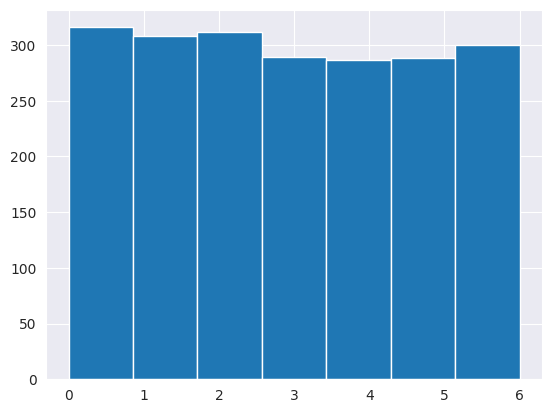

In [60]:
submission_df["crop"].hist(bins=7)

In [29]:
train_df.to_csv(DATA_DIR + "train_with_reg.csv")

In [30]:
test_df.to_csv(DATA_DIR + "test_with_reg.csv")